In [1]:
import matplotlib as mpl
import pylab as PP
import xarray as xr
import numpy as np
import cartopy
import copy

mpl.style.use('seaborn-poster')

In [2]:
def ar_detect_basic(ivt, lat ,lon):
    """ Implements a rudimentary AR detector that thresholds IVT at 250 kg/m/s and filters the tropics. """

    # create 2D lat/lon fields
    lon2d, lat2d = np.meshgrid(lon, lat)

    # find points where latitude is less than 15 degrees absolute
    i_lat_filter = np.nonzero(np.abs(lat2d.ravel()) < 15)[0]

    # set IVT to zero at those points
    ivt_detect = copy.deepcopy(ivt)
    ivt_detect.ravel()[i_lat_filter] = 0.0

    # threshold ivt
    ar_tag = np.array(ivt_detect >= 250).astype(int)

    return ar_tag

In [3]:
input_file = "/global/project/projectdirs/m1517/cascade/external_datasets/ARTMIP/MERRA_2D/1983/ARTMIP_MERRA_2D_19830930_00.nc"

with xr.open_dataset(input_file) as fin:
    ivt = fin['IVT']
    lat = fin['lat']
    lon = fin['lon']

In [4]:
ar_tag = ar_detect_basic(ivt.values, lat.values, lon.values)

ar_tag = xr.DataArray(ar_tag, dims = ('lat','lon'), coords = dict(lat = lat, lon = lon))




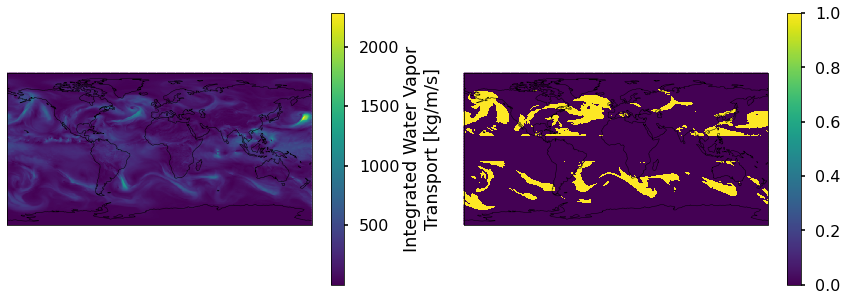

In [5]:
fig, axs = PP.subplots(1,2,figsize = (15,5),subplot_kw=dict(projection = cartopy.crs.PlateCarree()))

ivt.plot(ax = axs[0], transform = cartopy.crs.PlateCarree())
ar_tag.plot(ax = axs[1], transform = cartopy.crs.PlateCarree())

for ax in axs.ravel():
    ax.coastlines()

PP.show()